In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import DataLoader 
import torchvision.transforms as transform
import matplotlib.pyplot as plt
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# loading the data
train_data=datasets.FashionMNIST(root='/.data',download=True,train=True,transform=transform.ToTensor())
test_data=datasets.FashionMNIST(root='/.data',download=True,train=False,transform=transform.ToTensor())
train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=False)

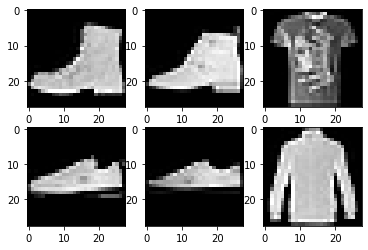

In [ ]:
examples=iter(train_loader)
images,labels=next(examples)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(images[i][0],cmap='gray')
plt.show()



In [ ]:
print(images.shape)
print(labels.shape)

torch.Size([4, 1, 28, 28])
torch.Size([4])


In [ ]:
input_size=28*28
num_classes=10
learning_rate=0.001
batch_size=4
hidden_size=50



# creating the neural network
class NN(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NN,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)
  def forward(self,x):
    x=self.l1(x)
    x=self.relu(x)
    x=self.l2(x)
    return x

model=NN(input_size,hidden_size,num_classes).to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=learning_rate)
print(len(train_loader))

15000


In [ ]:
n_total_steps=len(train_loader)
num_epochs=5
for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,input_size).to(device)
    labels=labels.to(device)
    # forward pass
    outputs=model(images)
    loss=criterion(outputs,labels)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # training loss
    if (i+1)%100==0:
      print(f'epoch{epoch+1}/{num_epochs},step {i+1}/{n_total_steps},loss={loss.item():.4f}')

epoch1/5,step 100/15000,loss=0.0484
epoch1/5,step 200/15000,loss=0.9621
epoch1/5,step 300/15000,loss=0.1436
epoch1/5,step 400/15000,loss=1.2094
epoch1/5,step 500/15000,loss=0.4409
epoch1/5,step 600/15000,loss=0.1662
epoch1/5,step 700/15000,loss=0.0144
epoch1/5,step 800/15000,loss=0.0717
epoch1/5,step 900/15000,loss=1.9955
epoch1/5,step 1000/15000,loss=1.7872
epoch1/5,step 1100/15000,loss=0.6417
epoch1/5,step 1200/15000,loss=0.1923
epoch1/5,step 1300/15000,loss=0.3274
epoch1/5,step 1400/15000,loss=0.1724
epoch1/5,step 1500/15000,loss=0.1058
epoch1/5,step 1600/15000,loss=0.1341
epoch1/5,step 1700/15000,loss=0.1766
epoch1/5,step 1800/15000,loss=0.1090
epoch1/5,step 1900/15000,loss=0.1151
epoch1/5,step 2000/15000,loss=0.5710
epoch1/5,step 2100/15000,loss=0.5887
epoch1/5,step 2200/15000,loss=0.0817
epoch1/5,step 2300/15000,loss=0.3580
epoch1/5,step 2400/15000,loss=0.1748
epoch1/5,step 2500/15000,loss=0.1060
epoch1/5,step 2600/15000,loss=1.2655
epoch1/5,step 2700/15000,loss=0.1188
epoch1/5,s

In [ ]:
with torch.no_grad():
  n_correct=0
  n_samples=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
  # value,index
    _,predictions=torch.max(outputs,1)

    n_samples+=labels.shape[0]
    n_correct+=(predictions==labels).sum().item()
  acc=100.0 * n_correct / n_samples
  print(f'accuracy={acc}')

accuracy=87.08


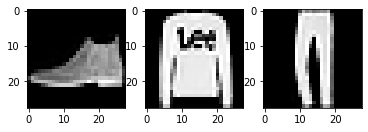

In [ ]:
test_examples=iter(test_loader)
test_image,_=next(test_examples)
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(test_image[i][0],cmap='gray')
plt.show()